## The Spark Foundation 

### 2nd Task

### Optimum No of clusters Using Unsupervise ML (K_Means)

### Completed By:- Prince Mishra

######  Tool Used:-  Jupyter Notebook (Language Used:- Python)

######  Loading Iris Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data=pd.read_csv('C:/Users/asus/Downloads/Iris.csv')

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###### 

##### EDA (Exploratory Data Analysis)

####   

###### Creating features Values And Labels

In [2]:
features = data.iloc[:,[1,2,3,4]].values
label = data.iloc[:,[-1]].values

<AxesSubplot:>

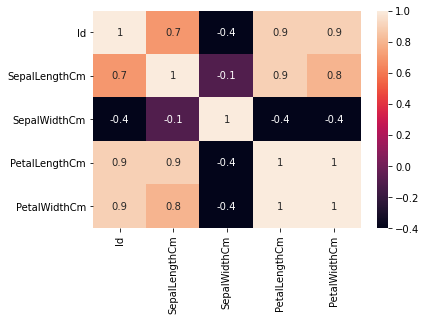

In [3]:
import seaborn as sns
correlation_matrix = data.corr().round(1)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
#the correlation co-efficient ranges from -1 to 1

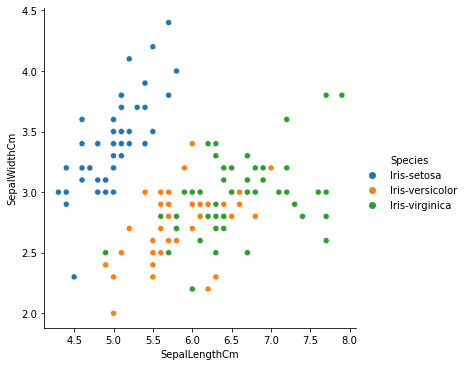

In [4]:
sns.relplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=data)

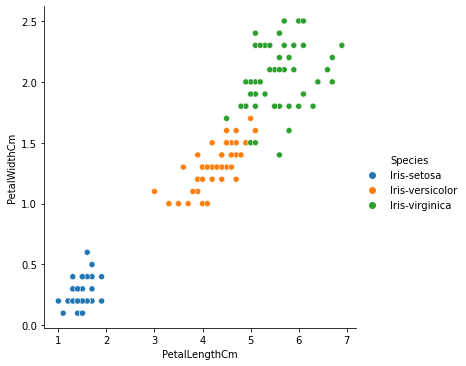

In [5]:
sns.relplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=data)

######   

#### Identify Optimum Number of K Means cluster By Elbow Technique

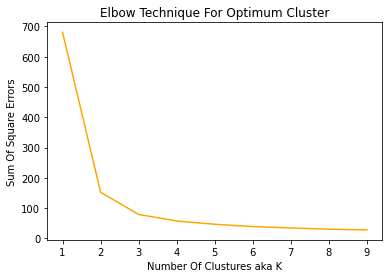

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.93873974358975,
 34.32508172302736,
 30.276436720142613,
 27.8792878787879]

In [6]:
from sklearn.cluster import KMeans
sse=[] #Sum of square errors
for k in range(1,10,1):
    km=KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)
plt.title("Elbow Technique For Optimum Cluster")
plt.xlabel("Number Of Clustures aka K")
plt.ylabel("Sum Of Square Errors")
plt.plot(range(1,10),sse,color="Orange")
plt.show()
sse

######  

From The above elbow Method it is Clearly Visible after Cluster Value $3$ no significant change in Sum of Square 

So We Conclude over optimum Number of cluster is $3$

######   

##### Now We apply the K_means to dataSet

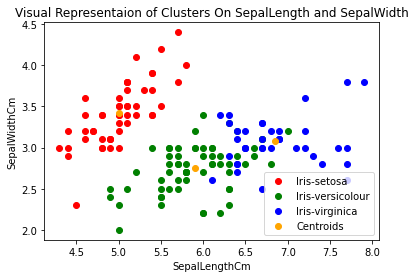

In [7]:
k_means=KMeans(n_clusters=3)
y_predict=k_means.fit_predict(features)

data['Cluster']=y_predict

data1=data[data.Cluster==0]
data2=data[data.Cluster==1]
data3=data[data.Cluster==2]

plt.scatter(data1.SepalLengthCm,data1.SepalWidthCm,color="Red",label = 'Iris-setosa')
plt.scatter(data2.SepalLengthCm,data2.SepalWidthCm,color="Green",label = 'Iris-versicolour')
plt.scatter(data3.SepalLengthCm,data3.SepalWidthCm,color="Blue",label = 'Iris-virginica')

plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color="Orange",marker="o",label="Centroids")
plt.title("Visual Representaion of Clusters On SepalLength and SepalWidth")
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()